In [1]:
import os
import pyctd
from chemspipy import ChemSpider

In [2]:
query = pyctd.query()

In [3]:
%%time
results = query.get_chem_gene_interaction_actions(as_df=True)

CPU times: user 5.35 s, sys: 540 ms, total: 5.89 s
Wall time: 5.9 s


In [4]:
len(results)

1460080

In [5]:
type(results)

pandas.core.frame.DataFrame

In [6]:
results.keys()

Index(['id', 'organism_id', 'interaction', 'chemical__id', 'gene__id'], dtype='object')

In [7]:
results.head()

,id,organism_id,interaction,chemical__id,gene__id
0,1,NaN,10074-G5 affects the folding of and results in...,14,286642.0
1,2,NaN,10074-G5 inhibits the reaction [MYC protein bi...,14,286642.0
2,3,9606.0,10074-G5 analog results in decreased expressio...,14,311198.0
3,4,9606.0,10074-G5 results in decreased activity of MYC ...,14,311198.0
4,5,9606.0,10074-G5 results in decreased expression of MY...,14,311198.0


In [8]:
%%time
results = query.get_chem_gene_interaction_actions(gene_symbol='APP', organism_id=9606)

CPU times: user 394 ms, sys: 271 ms, total: 665 ms
Wall time: 664 ms


In [9]:
result_example = results[0]
result_example

1-(3',4'-dichloro-2-fluoro(1,1'-biphenyl)-4-yl)cyclopropanecarboxylic acid -> amyloid beta precursor protein; interaction: 1-(3',4'-dichloro-2-fluoro(1,1'-biphenyl)-4-yl)cyclopropanecarboxylic acid results in decreased secretion of APP protein

In [10]:
chemical_example = result_example.chemical
chemical_example

1-(3',4'-dichloro-2-fluoro(1,1'-biphenyl)-4-yl)cyclopropanecarboxylic acid

In [11]:
for a in dir(chemical_example):
    if a.startswith('_'):
        continue
    
    print(a)
    print(getattr(chemical_example, a))
    print()

cas_rn
None

chemical_id
MESH:C522246

chemical_name
1-(3',4'-dichloro-2-fluoro(1,1'-biphenyl)-4-yl)cyclopropanecarboxylic acid

definition
None

drugbank_ids
[]

id
3757

inchi
None

isomeric_smiles
None

metadata
MetaData(bind=None)

parent_ids
[MESH:D003521, MESH:D005480]

parent_tree_numbers
[D02.241.081.751.161, D02.455.426.392.368.533, D02.455.426.559.389.185.350]

synonyms
[CHF5074, CHF 5074, CHF-5074]

table_suffix
chemical

tree_numbers
[D02.241.081.751.161/C522246, D02.455.426.392.368.533/C522246, D02.455.426.559.389.185.350/C522246]



# Search with ChemSpider

In [12]:
cs = ChemSpider(os.environ['CHEMSPIDER_TOKEN'])

In [13]:
chemical_example.chemical_id

'MESH:C522246'

In [14]:
chemical_example.chemical_id[5:]

'C522246'

In [16]:
result = [result for result in cs.simple_search(chemical_example.chemical_name)]
result

[Compound(8171990)]

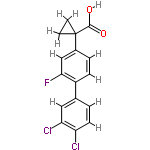

In [17]:
result[0]

In [22]:
for a in dir(result[0]):
    if a.startswith('_'):
        continue
        
    if a in {'image', 'mol_2d', 'mol_3d', 'mol_raw'}:
        continue
        
    print(a)
    print(getattr(result[0], a))
    print()
    
#print(result[0].common_name)

alogp
0.0

average_mass
325.1617

common_name
1-(3',4'-Dichloro-2-fluoro-4-biphenylyl)cyclopropanecarboxylic acid

csid
8171990

image_url
http://www.chemspider.com/ImagesHandler.ashx?id=8171990

inchi
InChI=1/C16H11Cl2FO2/c17-12-4-1-9(7-13(12)18)11-3-2-10(8-14(11)19)16(5-6-16)15(20)21/h1-4,7-8H,5-6H2,(H,20,21)

inchikey
LIYLTQQDABRNRX-UHFFFAOYAS

molecular_formula
C_{16}H_{11}Cl_{2}FO_{2}

molecular_weight
325.1617

monoisotopic_mass
324.012024

nominal_mass
324.0

smiles
c1cc(c(cc1c2ccc(cc2F)C3(CC3)C(=O)O)Cl)Cl

spectra
[]

stdinchi
InChI=1S/C16H11Cl2FO2/c17-12-4-1-9(7-13(12)18)11-3-2-10(8-14(11)19)16(5-6-16)15(20)21/h1-4,7-8H,5-6H2,(H,20,21)

stdinchikey
LIYLTQQDABRNRX-UHFFFAOYSA-N

xlogp
5.4

